In [24]:
## imports
import requests
import requests
import os
import time
import json
import pandas as pd


In [27]:
#example raw data using steamspy api
# Define the URL with the desired parameters
url = "https://steamspy.com/api.php"
params = {
    "request": "appdetails",
    "appid": 730
}

# Make the GET request
response = requests.get(url, params=params)

# Parse the JSON response
data = response.json()

# Print the data
print(data)


{'appid': 730, 'name': 'Counter-Strike: Global Offensive', 'developer': 'Valve', 'publisher': 'Valve', 'score_rank': '', 'positive': 7228351, 'negative': 1072336, 'userscore': 0, 'owners': '100,000,000 .. 200,000,000', 'average_forever': 31290, 'average_2weeks': 728, 'median_forever': 5300, 'median_2weeks': 303, 'price': '0', 'initialprice': '0', 'discount': '0', 'ccu': 1350439, 'languages': 'English, Czech, Danish, Dutch, Finnish, French, German, Hungarian, Italian, Japanese, Korean, Norwegian, Polish, Portuguese - Portugal, Portuguese - Brazil, Romanian, Russian, Simplified Chinese, Spanish - Spain, Swedish, Thai, Traditional Chinese, Turkish, Bulgarian, Ukrainian, Greek, Spanish - Latin America, Vietnamese, Indonesian', 'genre': 'Action, Free To Play', 'tags': {'FPS': 90398, 'Shooter': 65039, 'Multiplayer': 62010, 'Competitive': 53086, 'Action': 47305, 'Team-Based': 46209, 'e-sports': 43298, 'Tactical': 41160, 'First-Person': 39211, 'PvP': 34292, 'Online Co-Op': 33823, 'Co-op': 3013

In [116]:
def get_apps_by_page(page_number):
    url = "https://steamspy.com/api.php"
    params = {
        "request": "all",
        "page": page_number
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        response.raise_for_status()

def save_json_to_file(data, page_number, folder):
    filename = os.path.join(folder, f"page_{page_number}.json")
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)
    print(f"Saved page {page_number} to {filename}")

def get_and_save_all_apps(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)
    
    page_number = 1
    while page_number<60:
        print(f"Fetching page {page_number}...")
        apps = get_apps_by_page(page_number)
        if not apps:  
            break
        save_json_to_file(apps, page_number, folder)
        page_number += 1
        time.sleep(62)  # adding this to respect the rate limits for large requests to steamspy API



### Run the below cell only once when you download the data using the API

In [83]:
# folder = "steam_spy_data"
# get_and_save_all_apps(folder)


Fetching page 1...
Saved page 1 to steam_spy_data/page_1.json
Fetching page 2...
Saved page 2 to steam_spy_data/page_2.json
Fetching page 3...
Saved page 3 to steam_spy_data/page_3.json
Fetching page 4...
Saved page 4 to steam_spy_data/page_4.json
Fetching page 5...
Saved page 5 to steam_spy_data/page_5.json
Fetching page 6...
Saved page 6 to steam_spy_data/page_6.json
Fetching page 7...
Saved page 7 to steam_spy_data/page_7.json
Fetching page 8...
Saved page 8 to steam_spy_data/page_8.json
Fetching page 9...
Saved page 9 to steam_spy_data/page_9.json
Fetching page 10...
Saved page 10 to steam_spy_data/page_10.json
Fetching page 11...
Saved page 11 to steam_spy_data/page_11.json
Fetching page 12...
Saved page 12 to steam_spy_data/page_12.json
Fetching page 13...
Saved page 13 to steam_spy_data/page_13.json
Fetching page 14...
Saved page 14 to steam_spy_data/page_14.json
Fetching page 15...
Saved page 15 to steam_spy_data/page_15.json
Fetching page 16...
Saved page 16 to steam_spy_data/

## Preprocessing the downloaded JSON files (run only once)

In [25]:
path_to_data = 'steam_spy_data'
json_files = os.listdir(path_to_data)

In [26]:
json_files = [files for files in  json_files if files.endswith('.json')]

In [27]:
import json
# Open and read the JSON file
with open('steam_spy_data/{}'.format(json_files[0]), 'r') as file:
    data = json.load(file)

In [28]:
data_dict_list = []
for i in range(len(json_files)):
    with open('steam_spy_data/{}'.format(json_files[i]), 'r') as file:
        data = json.load(file)
        for j in data.keys():
            data_dict_list.append(data[j])
    

In [29]:
df = pd.DataFrame(data_dict_list)

In [30]:
df.head()

,appid,name,developer,publisher,score_rank,positive,negative,userscore,owners,average_forever,average_2weeks,median_forever,median_2weeks,price,initialprice,discount,ccu
0,738080,Creatio Ex Nihilo: Aition,Shoho Games,Shoho Games,,4,10,0,"50,000 .. 100,000",3,0,3,0,99,99,0,0
1,1467920,A Guidebook of Babel,StarryStarry,Thermite Games,,1059,63,0,"50,000 .. 100,000",453,0,453,0,1499,1499,0,32
2,240970,Half Minute Hero: The Second Coming,Opus,Marvelous,,504,45,0,"50,000 .. 100,000",170,0,212,0,999,999,0,2
3,1398100,Orwell's Animal Farm,Nerial,The Dairymen,,123,31,0,"50,000 .. 100,000",174,0,174,0,999,999,0,0
4,1623240,Maguntsche: Chapter One Remastered,Kaleb Wassa,"Kaleb Wassa, GlassDev Entertainment",,19,6,0,"50,000 .. 100,000",0,0,0,0,0,0,0,0


In [31]:
df.columns

Index(['appid', 'name', 'developer', 'publisher', 'score_rank', 'positive',
       'negative', 'userscore', 'owners', 'average_forever', 'average_2weeks',
       'median_forever', 'median_2weeks', 'price', 'initialprice', 'discount',
       'ccu'],
      dtype='object')

In [32]:
## Reading the dtasets after preprocessing the steamspy json files.

In [33]:
df = pd.read_csv('processed_steam_spy.csv')
description_data = pd.read_csv('steam_description_data.csv')
requirements =  pd.read_csv('steam_requirements_data.csv')

## Getting the common IDs 

After the data from steamspy is compiled into a dataframe. The common game ids across the steam spy data, steam game details data and game requirements data from Kaggle are retrieved. Then these datasets are filtered to just retain these common ids and the rest games are dropped.  

In [37]:
steam_id_reqs = set(requirements['steam_appid'])
steam_id_spy = set(df['steam_appid'])
steam_id_kaggle = set(description_data['steam_appid'])
common_ids = steam_id_spy.intersection(steam_id_kaggle).intersection(steam_id_reqs)

In [35]:
def save_json_to_file(data, page_number, folder):
    filename = os.path.join(folder, f"page_{page_number}.json")
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)
    print(f"Saved page {page_number} to {filename}")

def get_and_save_all_apps(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)
        
    for ids in common_ids:
        url = "https://steamspy.com/api.php"
        params = {
            "request": "appdetails",
            "appid": ids
        }

        # Make the GET request
        response = requests.get(url, params=params)
        
        filename = os.path.join(folder, f"app_{ids}.json")
        with open(filename, 'w') as f:
            json.dump(response.text, f, indent=4)
        # time.sleep(62)  # adding this to respect the rate limits for large requests to steamspy API


In [36]:
folder = "steam_spy_refined_raw"
get_and_save_all_apps(folder)


KeyboardInterrupt: 

In [ ]:
path_to_data = 'steam_spy_refined_raw'
json_files = os.listdir(path_to_data)

In [38]:
import ast

In [39]:
## compile refined steam spy dataframe 
path_to_data = 'steam_spy_refined_raw'
json_files = os.listdir(path_to_data)


json_files = [files for files in  json_files if files.endswith('.json')]

refined_data_dict_list = []
for i in range(len(json_files)):
    
    with open('steam_spy_refined_raw/{}'.format(json_files[i]), 'r') as file:
        try:
            data = ast.literal_eval(json.load(file))

            refined_data_dict_list.append(data)
        except:
            pass
    

In [40]:
refined_data = pd.DataFrame(refined_data_dict_list) 

In [41]:
len(refined_data)

20608

In [48]:
refined_data['score_rank']

0         
1         
2         
3         
4         
        ..
20603     
20604     
20605     
20606     
20607     
Name: score_rank, Length: 20608, dtype: object

In [44]:
common_ids = refined_data['appid']

In [45]:
## filtered data
df_filtered = refined_data[refined_data['appid'].isin(common_ids)]
description_data_filtered =  description_data[description_data['appid'].isin(common_ids)]
requirements_data_filtered =  requirements[requirements['appid'].isin(common_ids)]

KeyError: 'appid'

## Join the steamspy data with decription and requirements data from Kaggle

Post filtering the datsets are joined based on steam_appid

In [ ]:
refined_data.rename(columns = {'appid':'steam_appid'}, inplace= True)

In [ ]:
df_inter =  pd.merge(description_data_filtered, df_filtered, on="steam_appid", how = 'left' )

In [ ]:
df_final =  pd.merge(df_inter, requirements_data_filtered, on="steam_appid", how = 'left' )

In [ ]:
df_final.info()

In [201]:
df_final.to_csv('merged_refined_data.csv')

In [202]:
!pip install pandas matplotlib seaborn



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [140]:
df_final

,steam_appid,detailed_description,about_the_game,short_description,name,developer,publisher,score_rank,positive,negative,...,median_2weeks,price,initialprice,discount,ccu,pc_requirements,mac_requirements,linux_requirements,minimum,recommended
0,1002,Featuring a wide collection of single and mult...,Featuring a wide collection of single and mult...,Featuring a wide collection of single and mult...,Rag Doll Kung Fu,Mark Healey,Mark Healey,,88,28,...,0,99,99,0,0,{'minimum': '<strong>Minimum:</strong> Pentium...,[],[],"Pentium3 800 MHz (or compatible), 256 MB RAM, ...",NaN
1,1200,<h1>D-Day Anniversary 2016 Update for Darkest ...,Fight in the theatre of war that changed the w...,Fight in the theatre of war that changed the w...,Red Orchestra: Ostfront 41-45,Tripwire Interactive,Tripwire Interactive,,2103,309,...,0,499,499,0,13,{'minimum': '<strong>Minimum:</strong><br><ul ...,"{'minimum': '<ul class=""bb_ul""><li><strong>OS:...",{'minimum': '<strong>Minimum:</strong><br><ul ...,OS: Windows XP Processor: 1.2 GHZ or Equivalen...,OS: Windows XP Processor: 2.4 GHZ Graphcis: 12...
2,1300,"You are John Blade, commander of HardCorps, an...","You are John Blade, commander of HardCorps, an...","You are John Blade, commander of HardCorps, an...",SiN Episodes: Emergence,Ritual Entertainment,Ritual Entertainment,,992,118,...,0,999,999,0,3,{'minimum': '\r\n\t\t\t<p><strong>Minimum:</st...,[],[],"1.2 GHz Processor, 256MB RAM, DirectX 7 level ...",NaN
3,1500,Combining fast-paced action with strategic bat...,Combining fast-paced action with strategic bat...,Combining fast-paced action with strategic bat...,Darwinia,Introversion Software,Introversion Software,,840,210,...,0,999,999,0,1,{'minimum': '<p><strong>Recommended:</strong> ...,{'minimum': '<ul>\n\t<li><strong>OS:</strong> ...,{'minimum': '<ul>\n <li><strong...,"Recommended: Windows XP, 600MHz CPU, 128MB RAM...",NaN
4,1520,"Inspired by the 1983 cult classic film, Wargam...","Inspired by the 1983 cult classic film, Wargam...","Inspired by the 1983 cult classic film, Wargam...",DEFCON,Introversion Software,Introversion Software,,3504,522,...,0,999,999,0,16,{'minimum': '<strong>Recommended:</strong> Win...,"{'minimum': '<ul class=""bb_ul""><li><strong>OS:...","{'minimum': '<ul class=""bb_ul""><li><strong>Pro...","Recommended: Windows XP, P3-600-Geforce 2, 128...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21522,1063560,"<img src=""https://steamcdn-a.akamaihd.net/stea...","<img src=""https://steamcdn-a.akamaihd.net/stea...",The protagonist was in a very nightmarish and ...,12 HOURS,Second Reality,Second Reality,,41,31,...,0,399,399,0,0,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],[],OS: WindowsXP (Service Pack 3) Processor: Quad...,OS: Windows 7 or higher Processor: Intel Core ...
21523,1064060,"This game is a point and click, sandbox erotic...","This game is a point and click, sandbox erotic...",Solve puzzles and meet beautiful women in this...,The Mystery of Bikini Island,Velvet Paradise Games,Velvet Paradise Games,,29,22,...,0,99,99,0,0,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],[],OS: Windows 7+ Processor: Intel i3 or equivale...,NaN
21524,1064580,"In the game you control the spacecraft, and in...","In the game you control the spacecraft, and in...","In the game CaptainMarlene, you control the sp...",CaptainMarlene,Dnovel,Conglomerate 5,,16,5,...,0,99,99,0,0,{'minimum': '<strong>Minimum:</strong><br><ul ...,[],[],OS: Windows 7 or later Processor: intel x86 fa...,NaN
21525,1065160,You are an overworked business man who had a l...,You are an overworked business man who had a l...,Deatherem is a first person survival horror ex...,Deatherem,Anima,Team Syukino,,3,11,...,0,0,0,0,0,{'minimum': '<strong>最低配置:</strong><br><ul cla...,[],[],最低配置: 操作系统: Windows 7/8.1/10 处理器: Intel Core 2...,推荐配置: 操作系统: Windows 10 处理器: Intel Core 2 Duo p...


## Basic Feature Selection

1. As games can be for various platforms like windows, linux or mac. So for better generalizability we will consider the minimum requirements as most players just consider the minimum requirement of a game while installing it on a system. So we drop the columns pc, linux, mac and recommended requiremnts.

2. After going through the game description data it can be noticed that the short description and long description almost match with about the game for almost all the games. Hence the short and long description columns are dropped and the about teh column is retained.

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59000 entries, 0 to 58999
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   steam_appid      59000 non-null  int64 
 1   name             59000 non-null  object
 2   developer        59000 non-null  object
 3   publisher        59000 non-null  object
 4   score_rank       59000 non-null  object
 5   positive         59000 non-null  int64 
 6   negative         59000 non-null  int64 
 7   userscore        59000 non-null  int64 
 8   owners           59000 non-null  object
 9   average_forever  59000 non-null  int64 
 10  average_2weeks   59000 non-null  int64 
 11  median_forever   59000 non-null  int64 
 12  median_2weeks    59000 non-null  int64 
 13  price            58996 non-null  object
 14  initialprice     58996 non-null  object
 15  discount         58996 non-null  object
 16  ccu              59000 non-null  int64 
dtypes: int64(9), object(8)
memory u

In [144]:
requirements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27319 entries, 0 to 27318
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   steam_appid         27319 non-null  int64 
 1   pc_requirements     27319 non-null  object
 2   mac_requirements    27319 non-null  object
 3   linux_requirements  27319 non-null  object
 4   minimum             27314 non-null  object
 5   recommended         14134 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.3+ MB


In [146]:
description_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27334 entries, 0 to 27333
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   steam_appid           27334 non-null  int64 
 1   detailed_description  27334 non-null  object
 2   about_the_game        27334 non-null  object
 3   short_description     27334 non-null  object
dtypes: int64(1), object(3)
memory usage: 854.3+ KB


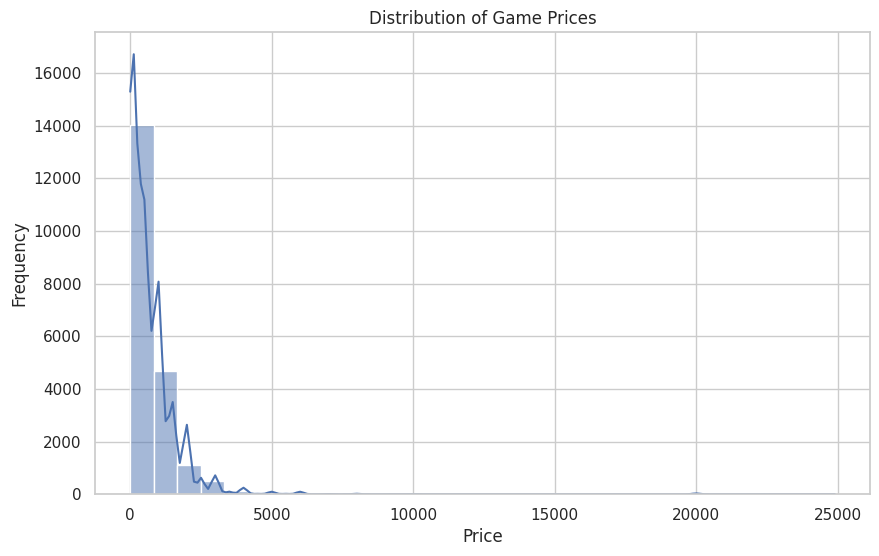

In [205]:
# 1. Distribution of prices of games
plt.figure(figsize=(10,6))
df_final['price'] = pd.to_numeric(df_final['price'], errors='coerce')  # Ensure 'price' is numeric
sns.histplot(df_final['price'], kde=True, bins=30)
plt.title('Distribution of Game Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


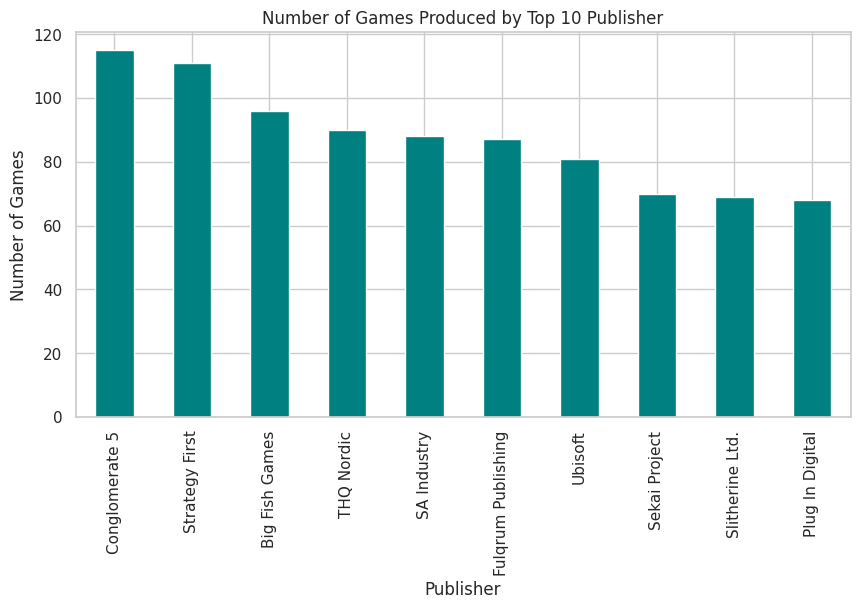

In [222]:
# 2. Number of games produced by top 10 producers (developers)
plt.figure(figsize=(10,5))
top_pubs = df_final['publisher'].value_counts().head(10)
top_pubs.plot(kind='bar', color='teal')
plt.title('Number of Games Produced by Top 10 Publisher')
plt.ylabel('Number of Games')
plt.xlabel('Publisher')
plt.show()


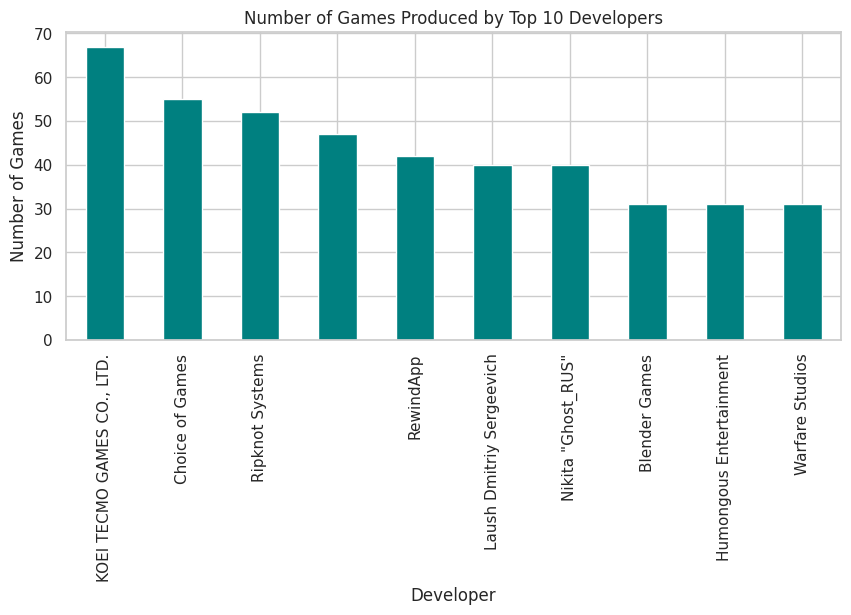

In [224]:
plt.figure(figsize=(10,4))
top_devs = df_final['developer'].value_counts().head(10)
top_devs.plot(kind='bar', color='teal')
plt.title('Number of Games Produced by Top 10 Developers')
plt.ylabel('Number of Games')
plt.xlabel('Developer')
plt.show()

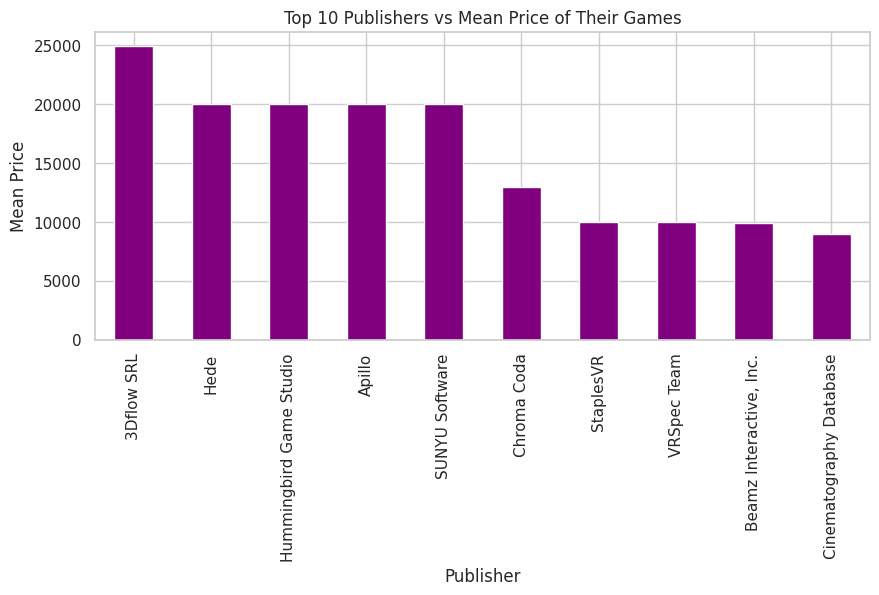

In [227]:
# 4. Top 10 publishers vs their mean price
plt.figure(figsize=(10,4))
df_final['price'] = pd.to_numeric(df_final['price'], errors='coerce')
publisher_mean_price = df_final.groupby('publisher')['price'].mean().sort_values(ascending=False).head(10)
publisher_mean_price.plot(kind='bar', color='purple')
plt.title('Top 10 Publishers vs Mean Price of Their Games')
plt.ylabel('Mean Price')
plt.xlabel('Publisher')
plt.show()


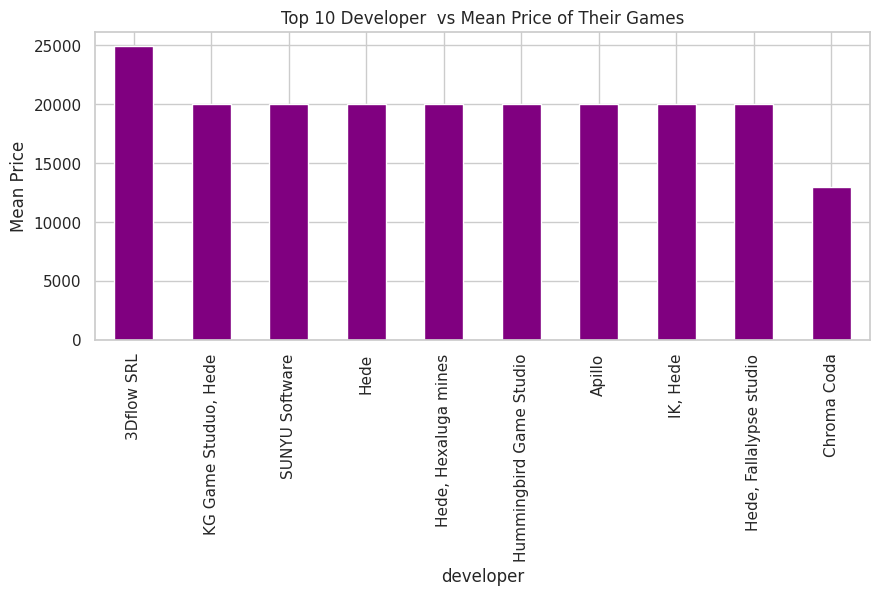

In [228]:
# 4. Top 10 publishers vs their mean price
plt.figure(figsize=(10,4))
df_final['price'] = pd.to_numeric(df_final['price'], errors='coerce')
dev_mean_price = df_final.groupby('developer')['price'].mean().sort_values(ascending=False).head(10)
dev_mean_price.plot(kind='bar', color='purple')
plt.title('Top 10 Developer  vs Mean Price of Their Games')
plt.ylabel('Mean Price')
plt.xlabel('developer')
plt.show()


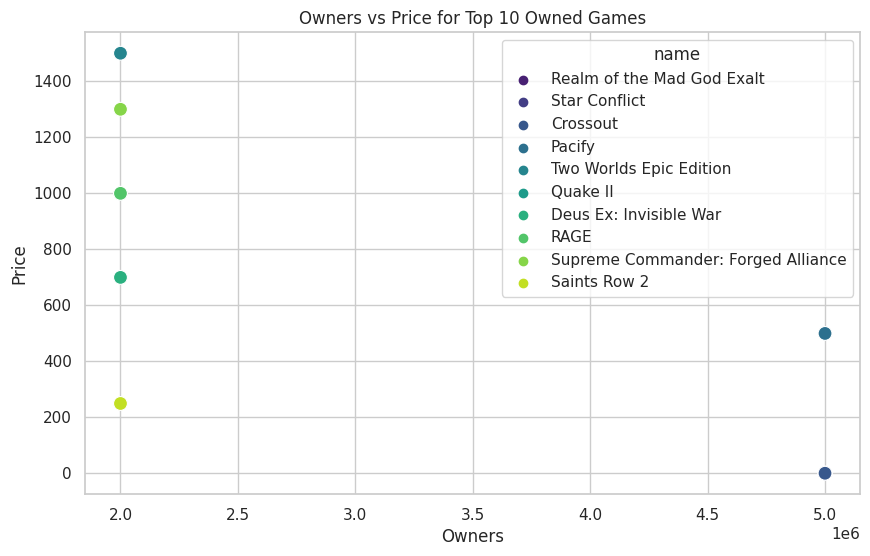

In [235]:
# 5. Owners vs price for top 10 owned games
top_owned_games = df_final.nlargest(10, 'owners')
plt.figure(figsize=(10,6))
sns.scatterplot(x='owners', y='price', data=top_owned_games, hue='name', palette='viridis', s=100)
plt.title('Owners vs Price for Top 10 Owned Games')
plt.xlabel('Owners')
plt.ylabel('Price')
plt.show()


/home/taps/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21476 (\N{CJK UNIFIED IDEOGRAPH-53E4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/taps/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21073 (\N{CJK UNIFIED IDEOGRAPH-5251}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/taps/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22855 (\N{CJK UNIFIED IDEOGRAPH-5947}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/taps/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35885 (\N{CJK UNIFIED IDEOGRAPH-8C2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/taps/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current fon

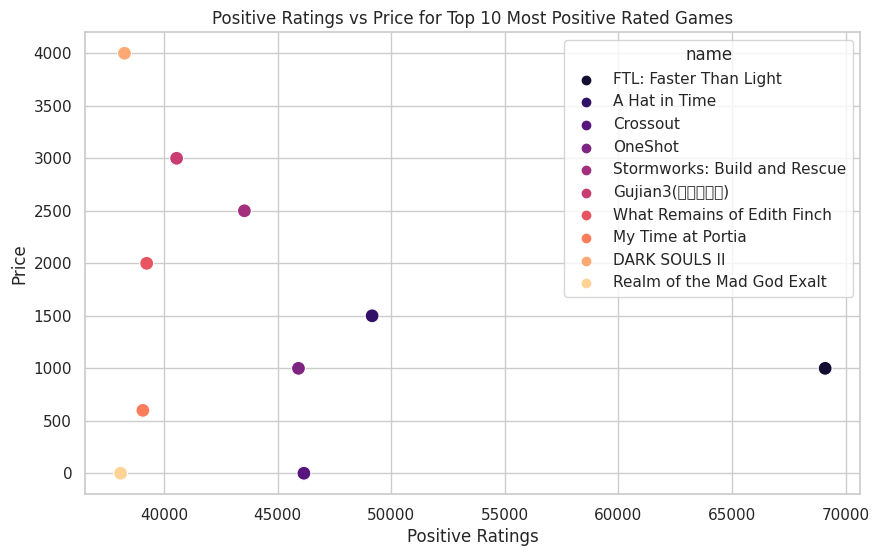

In [230]:
# 6. Positive ratings vs price for top 10 most positive rated games
top_positive_rated_games = df_final.nlargest(10, 'positive')
plt.figure(figsize=(10,6))
sns.scatterplot(x='positive', y='price', data=top_positive_rated_games, hue='name', palette='magma', s=100)
plt.title('Positive Ratings vs Price for Top 10 Most Positive Rated Games')
plt.xlabel('Positive Ratings')
plt.ylabel('Price')
plt.show()


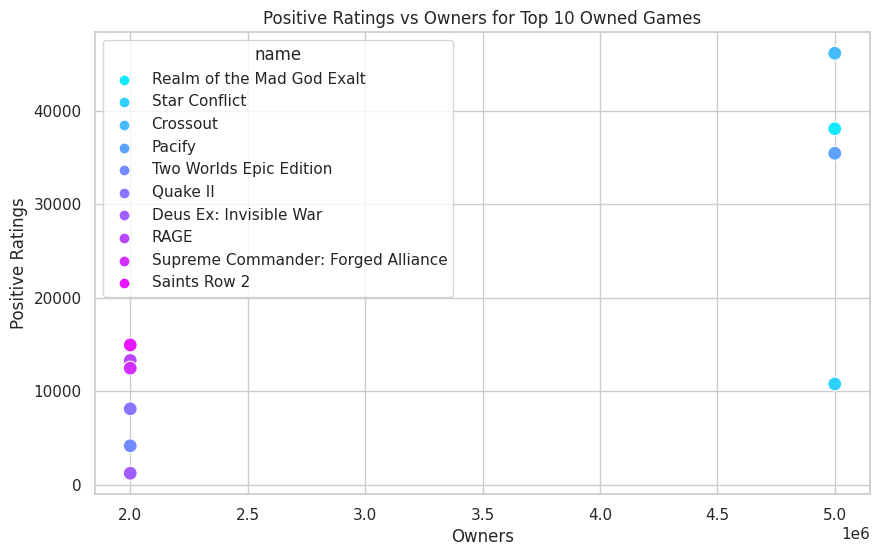

In [236]:
# 7. Positive ratings vs owned for top 10 owned games
plt.figure(figsize=(10,6))
sns.scatterplot(x='owners', y='positive', data=top_owned_games, hue='name', palette='cool', s=100)
plt.title('Positive Ratings vs Owners for Top 10 Owned Games')
plt.xlabel('Owners')
plt.ylabel('Positive Ratings')
plt.show()


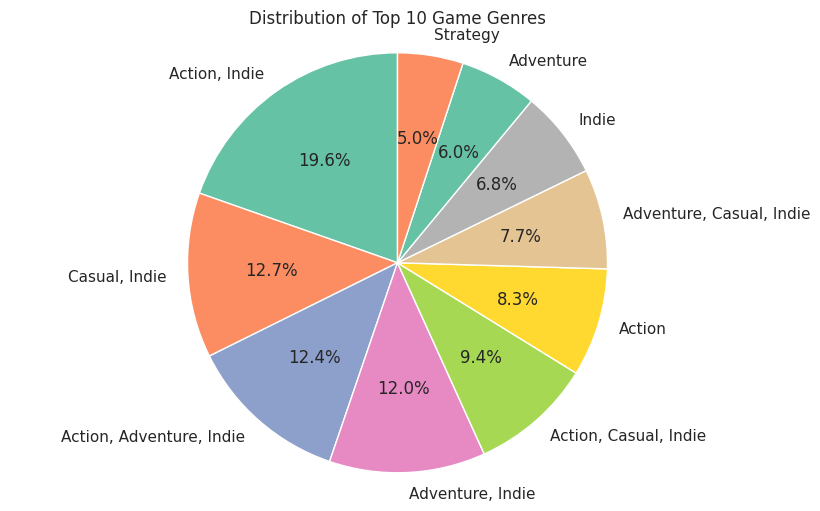

In [242]:
plt.figure(figsize=(10,6))
genre_counts = df_final['genre'].value_counts().head(10)  # Top 10 genres
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2", 10))
plt.title('Distribution of Top 10 Game Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()


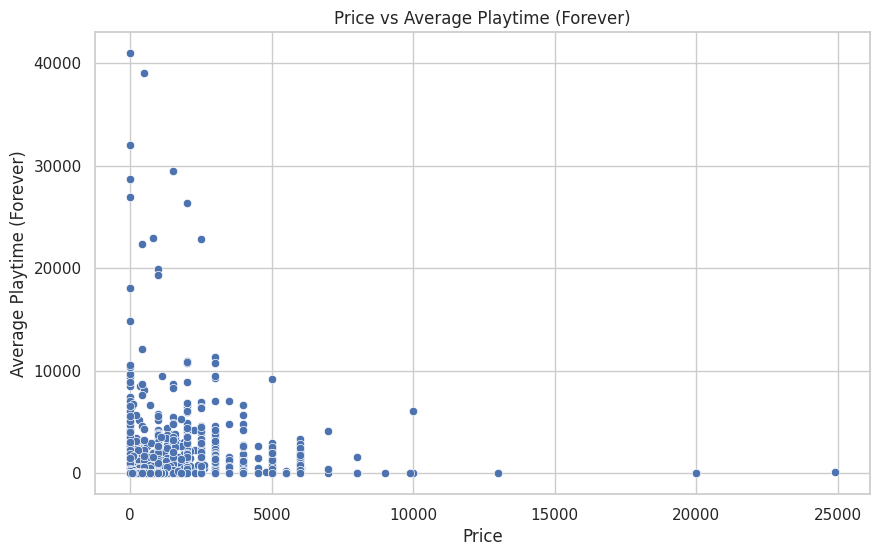

In [244]:
plt.figure(figsize=(10,6))
df_final['price'] = pd.to_numeric(df_final['price'], errors='coerce')
sns.scatterplot(x='price', y='average_forever', data=df_final)
plt.title('Price vs Average Playtime (Forever)')
plt.xlabel('Price')
plt.ylabel('Average Playtime (Forever)')
plt.show()


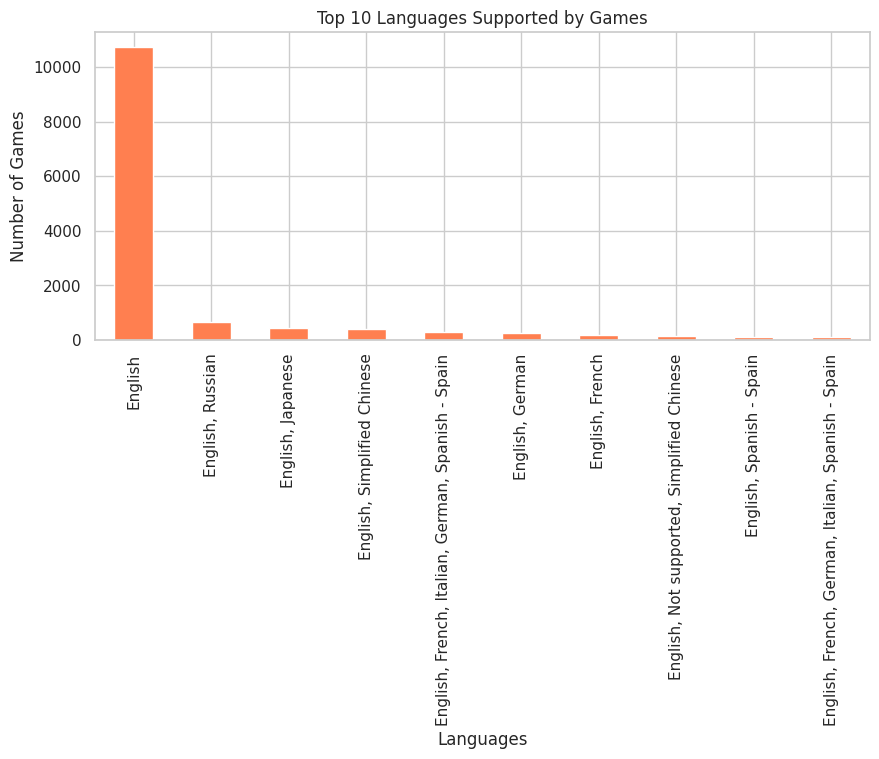

In [249]:
plt.figure(figsize=(10,4))
language_counts = df_final['languages'].value_counts().head(10)
language_counts.plot(kind='bar', color='coral')
plt.title('Top 10 Languages Supported by Games')
plt.ylabel('Number of Games')
plt.xlabel('Languages')
plt.show()


In [252]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20608 entries, 0 to 20607
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   steam_appid           20608 non-null  int64  
 1   detailed_description  20608 non-null  object 
 2   about_the_game        20608 non-null  object 
 3   short_description     20608 non-null  object 
 4   name                  20608 non-null  object 
 5   developer             20608 non-null  object 
 6   publisher             20608 non-null  object 
 7   score_rank            20608 non-null  object 
 8   positive              20608 non-null  int64  
 9   negative              20608 non-null  int64  
 10  userscore             20608 non-null  int64  
 11  owners                20608 non-null  float64
 12  average_forever       20608 non-null  int64  
 13  average_2weeks        20608 non-null  int64  
 14  median_forever        20608 non-null  int64  
 15  median_2weeks      

In [253]:
df_final.drop(['pc_requirements', 'mac_requirements', 'linux_requirements', 'recommended','detailed_description', 'short_description'], axis= 1, inplace= True)

In [255]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20608 entries, 0 to 20607
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   steam_appid      20608 non-null  int64  
 1   about_the_game   20608 non-null  object 
 2   name             20608 non-null  object 
 3   developer        20608 non-null  object 
 4   publisher        20608 non-null  object 
 5   score_rank       20608 non-null  object 
 6   positive         20608 non-null  int64  
 7   negative         20608 non-null  int64  
 8   userscore        20608 non-null  int64  
 9   owners           20608 non-null  float64
 10  average_forever  20608 non-null  int64  
 11  average_2weeks   20608 non-null  int64  
 12  median_forever   20608 non-null  int64  
 13  median_2weeks    20608 non-null  int64  
 14  price            20608 non-null  int64  
 15  initialprice     20608 non-null  object 
 16  discount         20608 non-null  object 
 17  ccu         

In [53]:
df_final.to_csv('processed_final_data.csv')

NameError: name 'df_final' is not defined

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('processed_final_data.csv')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20608 entries, 0 to 20607
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20608 non-null  int64  
 1   steam_appid      20608 non-null  int64  
 2   about_the_game   20608 non-null  object 
 3   name             20604 non-null  object 
 4   developer        20561 non-null  object 
 5   publisher        20587 non-null  object 
 6   score_rank       34 non-null     float64
 7   positive         20608 non-null  int64  
 8   negative         20608 non-null  int64  
 9   userscore        20608 non-null  int64  
 10  owners           20608 non-null  float64
 11  average_forever  20608 non-null  int64  
 12  average_2weeks   20608 non-null  int64  
 13  median_forever   20608 non-null  int64  
 14  median_2weeks    20608 non-null  int64  
 15  price            20608 non-null  int64  
 16  initialprice     20608 non-null  int64  
 17  discount    

In [57]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [58]:
df.drop('score_rank', inplace = True, axis =1)

In [59]:
df.columns

Index(['steam_appid', 'about_the_game', 'name', 'developer', 'publisher',
       'positive', 'negative', 'userscore', 'owners', 'average_forever',
       'average_2weeks', 'median_forever', 'median_2weeks', 'price',
       'initialprice', 'discount', 'ccu', 'languages', 'genre', 'tags',
       'minimum'],
      dtype='object')

In [60]:
df.head(5)

,steam_appid,about_the_game,name,developer,publisher,positive,negative,userscore,owners,average_forever,...,median_forever,median_2weeks,price,initialprice,discount,ccu,languages,genre,tags,minimum
0,1002,Featuring a wide collection of single and mult...,Rag Doll Kung Fu,Mark Healey,Mark Healey,88,28,0,50000.0,15,...,29,0,99,99,0,0,English,Indie,"{'2D Fighter': 47, 'Martial Arts': 41, 'Intent...","Pentium3 800 MHz (or compatible), 256 MB RAM, ..."
1,1200,Fight in the theatre of war that changed the w...,Red Orchestra: Ostfront 41-45,Tripwire Interactive,Tripwire Interactive,2103,309,0,1000000.0,488,...,238,0,499,499,0,13,"English, French, Russian",Action,"{'World War II': 164, 'Action': 130, 'FPS': 12...",OS: Windows XP Processor: 1.2 GHZ or Equivalen...
2,1300,"You are John Blade, commander of HardCorps, an...",SiN Episodes: Emergence,Ritual Entertainment,Ritual Entertainment,992,118,0,200000.0,112,...,175,0,999,999,0,3,"English, Russian, French",Action,"{'Action': 118, 'FPS': 76, 'Cyberpunk': 49, 'S...","1.2 GHz Processor, 256MB RAM, DirectX 7 level ..."
3,1500,Combining fast-paced action with strategic bat...,Darwinia,Introversion Software,Introversion Software,840,210,0,200000.0,456,...,399,0,999,999,0,1,"English, German, French, Italian, Spanish - Spain","Indie, Strategy","{'Indie': 573, 'Tactical RPG': 445, ""Shoot 'Em...","Recommended: Windows XP, 600MHz CPU, 128MB RAM..."
4,1520,"Inspired by the 1983 cult classic film, Wargam...",DEFCON,Introversion Software,Introversion Software,3504,522,0,500000.0,172,...,34,0,999,999,0,16,"English, French, German, Italian, Spanish - Spain","Indie, Strategy","{'Cold War': 451, 'Wargame': 438, 'RTS': 431, ...","Recommended: Windows XP, P3-600-Geforce 2, 128..."


In [61]:
df.isna().sum()

steam_appid         0
about_the_game      0
name                4
developer          47
publisher          21
positive            0
negative            0
userscore           0
owners              0
average_forever     0
average_2weeks      0
median_forever      0
median_2weeks       0
price               0
initialprice        0
discount            0
ccu                 0
languages           1
genre              56
tags                0
minimum             4
dtype: int64

In [63]:
df.dropna(inplace = True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20521 entries, 0 to 20607
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   steam_appid      20521 non-null  int64  
 1   about_the_game   20521 non-null  object 
 2   name             20521 non-null  object 
 3   developer        20521 non-null  object 
 4   publisher        20521 non-null  object 
 5   positive         20521 non-null  int64  
 6   negative         20521 non-null  int64  
 7   userscore        20521 non-null  int64  
 8   owners           20521 non-null  float64
 9   average_forever  20521 non-null  int64  
 10  average_2weeks   20521 non-null  int64  
 11  median_forever   20521 non-null  int64  
 12  median_2weeks    20521 non-null  int64  
 13  price            20521 non-null  int64  
 14  initialprice     20521 non-null  int64  
 15  discount         20521 non-null  int64  
 16  ccu              20521 non-null  int64  
 17  languages   

In [66]:
## we combine the posetive and negative to create the targte column for our prediction
df['negative'] = -1*df['negative']

In [67]:
df['cum_review'] = df['positive'] + df['negative']

In [68]:
df['cum_review']

0          60
1        1794
2         874
3         630
4        2982
         ... 
20603      10
20604       7
20605      11
20606      -8
20607       9
Name: cum_review, Length: 20521, dtype: int64

In [71]:
df.reset_index(inplace= True)

In [72]:
df['cum_review']

0          60
1        1794
2         874
3         630
4        2982
         ... 
20516      10
20517       7
20518      11
20519      -8
20520       9
Name: cum_review, Length: 20521, dtype: int64

In [74]:
df.drop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20521 entries, 0 to 20520
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            20521 non-null  int64  
 1   steam_appid      20521 non-null  int64  
 2   about_the_game   20521 non-null  object 
 3   name             20521 non-null  object 
 4   developer        20521 non-null  object 
 5   publisher        20521 non-null  object 
 6   positive         20521 non-null  int64  
 7   negative         20521 non-null  int64  
 8   userscore        20521 non-null  int64  
 9   owners           20521 non-null  float64
 10  average_forever  20521 non-null  int64  
 11  average_2weeks   20521 non-null  int64  
 12  median_forever   20521 non-null  int64  
 13  median_2weeks    20521 non-null  int64  
 14  price            20521 non-null  int64  
 15  initialprice     20521 non-null  int64  
 16  discount         20521 non-null  int64  
 17  ccu         

In [77]:
df.drop(columns = ['positive', 'negative'], inplace= True)

In [80]:
df.drop(columns = ['index'], inplace = True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20521 entries, 0 to 20520
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   steam_appid      20521 non-null  int64  
 1   about_the_game   20521 non-null  object 
 2   name             20521 non-null  object 
 3   developer        20521 non-null  object 
 4   publisher        20521 non-null  object 
 5   userscore        20521 non-null  int64  
 6   owners           20521 non-null  float64
 7   average_forever  20521 non-null  int64  
 8   average_2weeks   20521 non-null  int64  
 9   median_forever   20521 non-null  int64  
 10  median_2weeks    20521 non-null  int64  
 11  price            20521 non-null  int64  
 12  initialprice     20521 non-null  int64  
 13  discount         20521 non-null  int64  
 14  ccu              20521 non-null  int64  
 15  languages        20521 non-null  object 
 16  genre            20521 non-null  object 
 17  tags        

In [84]:
df.isna().sum()

steam_appid        0
about_the_game     0
name               0
developer          0
publisher          0
userscore          0
owners             0
average_forever    0
average_2weeks     0
median_forever     0
median_2weeks      0
price              0
initialprice       0
discount           0
ccu                0
languages          0
genre              0
tags               0
minimum            0
cum_review         0
dtype: int64

In [88]:
df.drop(columns = ['userscore'],inplace= True)

In [90]:
## user_score and score_rank were dropped as most of the values are either 0 for userscore and for score_rank most have a empty string

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20521 entries, 0 to 20520
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   steam_appid      20521 non-null  int64  
 1   about_the_game   20521 non-null  object 
 2   name             20521 non-null  object 
 3   developer        20521 non-null  object 
 4   publisher        20521 non-null  object 
 5   owners           20521 non-null  float64
 6   average_forever  20521 non-null  int64  
 7   average_2weeks   20521 non-null  int64  
 8   median_forever   20521 non-null  int64  
 9   median_2weeks    20521 non-null  int64  
 10  price            20521 non-null  int64  
 11  initialprice     20521 non-null  int64  
 12  discount         20521 non-null  int64  
 13  ccu              20521 non-null  int64  
 14  languages        20521 non-null  object 
 15  genre            20521 non-null  object 
 16  tags             20521 non-null  object 
 17  minimum     

In [95]:
df.to_csv('cleaned_final_data.csv')

In [92]:
## identifier is steam_appid

##### Lets select the numerical columns and our identfier as the final dataset on which we perform PCA

In [94]:
df_pca =  df[['steam_appid', 'owners','average_forever','average_2weeks', 'median_forever', 'median_2weeks', 'price',
             'initialprice', 'ccu', 'discount', 'cum_review']]

In [97]:
df_pca['average_2weeks'].value_counts()

0       20153
1          26
61         17
2          10
4           7
        ...  
321         1
1154        1
637         1
325         1
396         1
Name: average_2weeks, Length: 188, dtype: int64

In [ ]:
df_pca[]

#### form the above numerical columns we will drop average_2weeks and median_2weeks as most of the values are 0 hrs here which does not make sense to include these as features